### **Importing of libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

### **Reading the csv file for Regression**

Dropped the column 'Region' since it poses Curse of Dimensionality.

In [ ]:
dataset = pd.read_csv('avocado_for_training.csv')
dataset = dataset.drop(columns = ['Region'])

Storing the remaining columns to use for further computations.

In [ ]:
columns = ['Date', 'Small', 'Large', 'XLarge', 'Small Bags', 'Large Bags', 'XLarge Bags', 'Type', 'Year']

### **Correlation Matrix**

Correlation matrix and correlation scores for each independent feature against dependent feature 'Average Price'

In [ ]:
correlation_matrix = dataset.corr()

print("Correlation Matrix:")
print(correlation_matrix)

correlation_scores = []
positive = []
negative = []

for column in columns:
  independent_variable = column
  dependent_variable = 'Average Price'
  correlation = correlation_matrix.loc[independent_variable, dependent_variable]
  correlation_scores.append(correlation)
  if correlation > 0:
    positive.append(columns.index(column))
  else:
    negative.append(columns.index(column))

Correlation Matrix:
                   Date  Average Price     Small     Large    XLarge  \
Date           1.000000       0.144946  0.001115 -0.000642 -0.046810   
Average Price  0.144946       1.000000 -0.571401 -0.471338 -0.517931   
Small          0.001115      -0.571401  1.000000  0.786025  0.756059   
Large         -0.000642      -0.471338  0.786025  1.000000  0.810136   
XLarge        -0.046810      -0.517931  0.756059  0.810136  1.000000   
Small Bags     0.187043      -0.505447  0.791672  0.793284  0.769368   
Large Bags     0.185608      -0.497655  0.632600  0.650405  0.582207   
XLarge Bags    0.168994      -0.412866  0.603989  0.612979  0.643383   
Type          -0.000060       0.621059 -0.726710 -0.744364 -0.784707   
Year           0.950274       0.091900  0.011944  0.009653 -0.038700   

               Small Bags  Large Bags  XLarge Bags      Type      Year  
Date             0.187043    0.185608     0.168994 -0.000060  0.950274  
Average Price   -0.505447   -0.497655    

**Inference from Correlation Matrix**

In [ ]:
print('Positively Correlated attributes with Price\n')
for i in positive:
  print(columns[i], " - ", round(correlation_scores[i], 6))

print('\nNegatively Correlated attributes with Price\n')
for i in negative:
  print(columns[i], " - ", round(correlation_scores[i], 6))

Positively Correlated attributes with Price

Date  -  0.144946
Type  -  0.621059
Year  -  0.0919

Negatively Correlated attributes with Price

Small  -  -0.571401
Large  -  -0.471338
XLarge  -  -0.517931
Small Bags  -  -0.505447
Large Bags  -  -0.497655
XLarge Bags  -  -0.412866


### **Scatter Plots**

**Scatter Plots for Positively correlated attributes against 'Average Price'.**


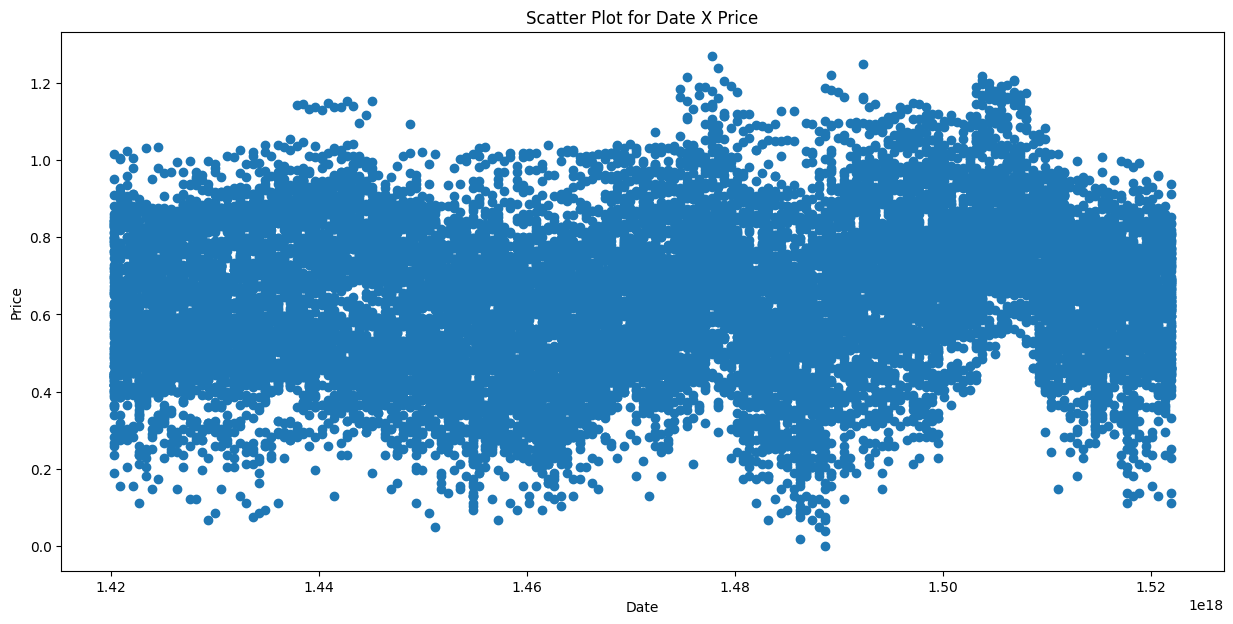

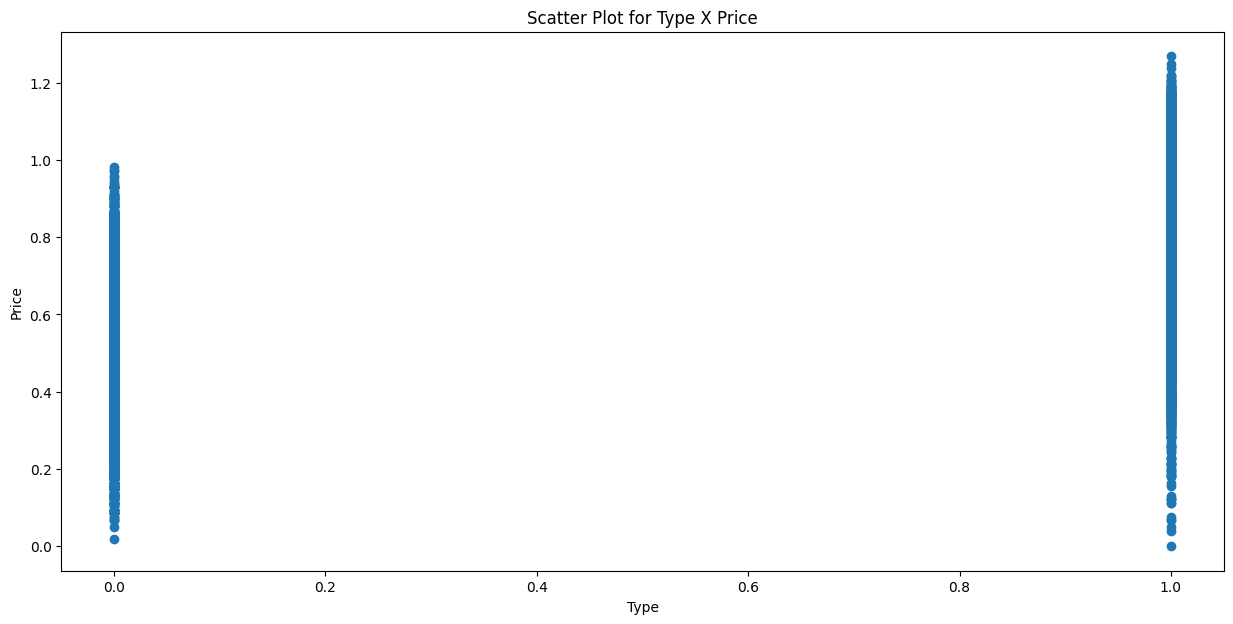

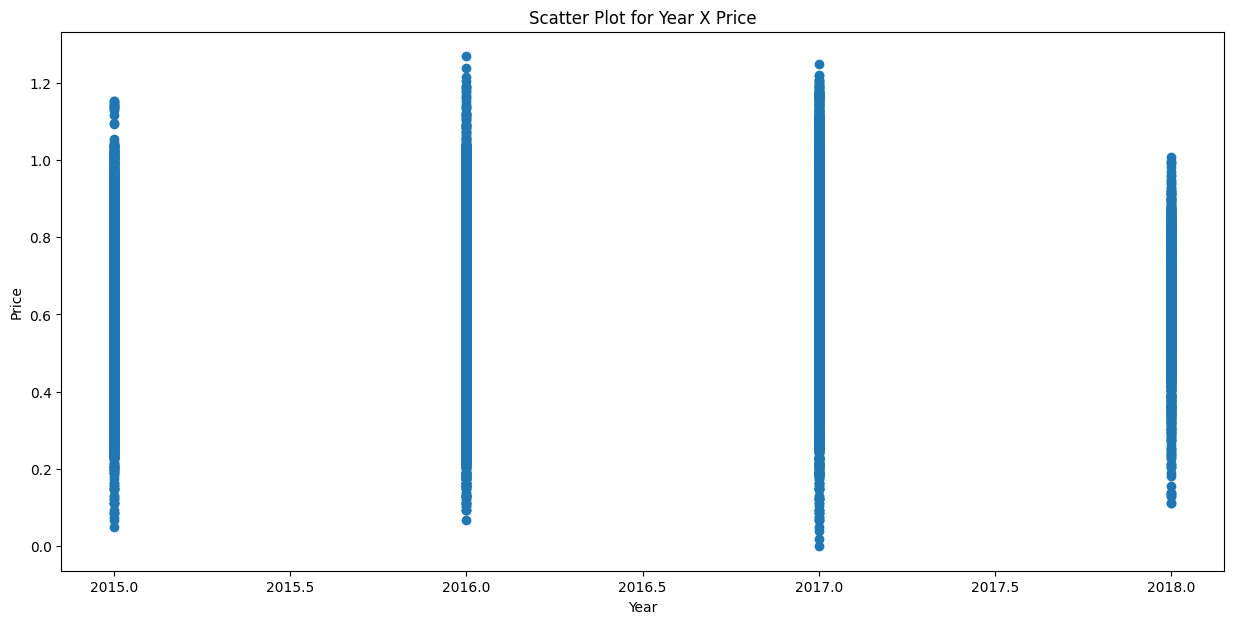

In [ ]:
for i in positive:
  plt.figure(figsize=(15, 7))
  plt.scatter(dataset[columns[i]], dataset['Average Price'])
  plt.xlabel(f'{columns[i]}')
  plt.ylabel('Price')
  plt.title(f'Scatter Plot for {columns[i]} X Price')
  plt.show()

**Scatter Plots for Negatively correlated attributes against 'Average Price'.**

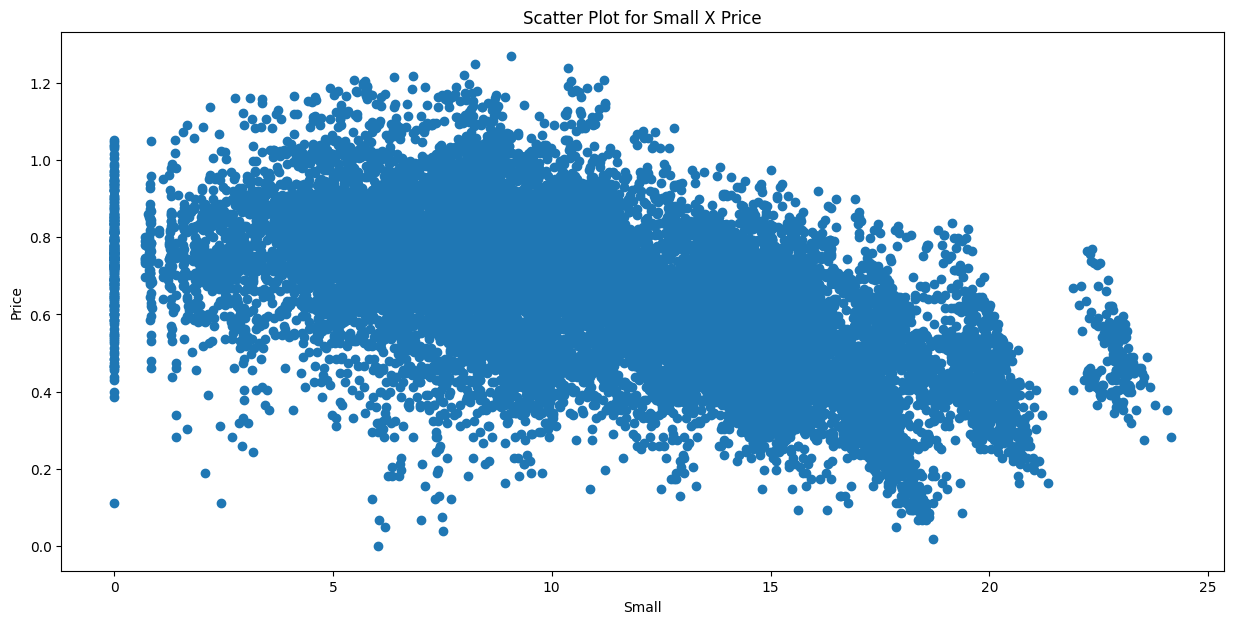

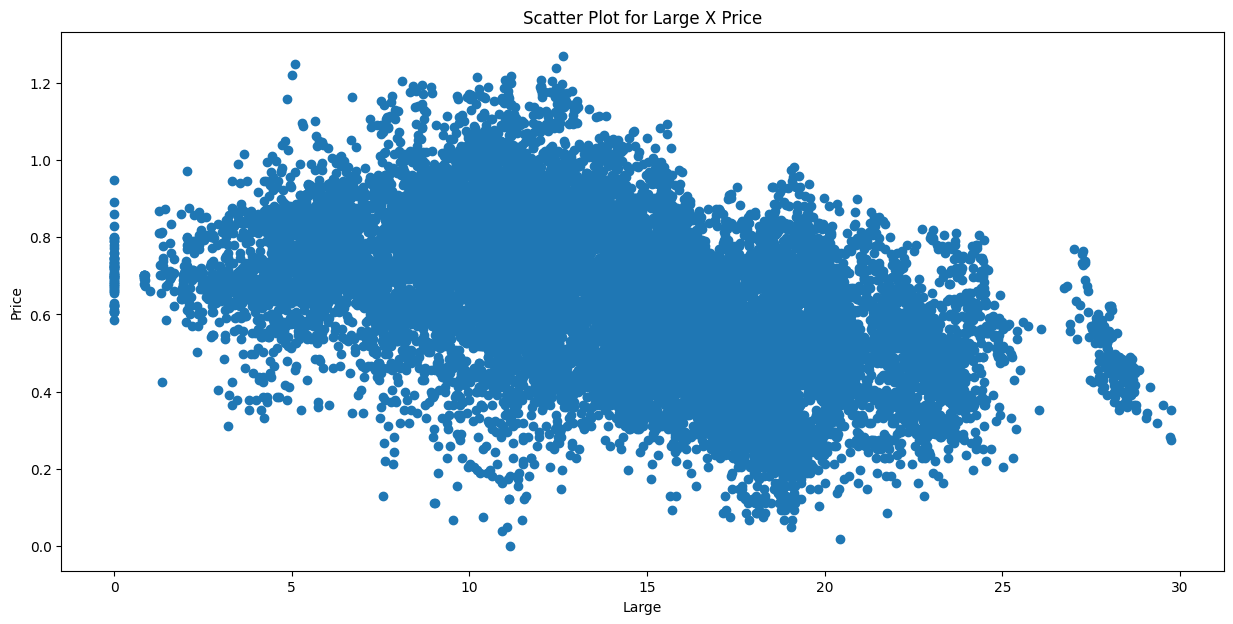

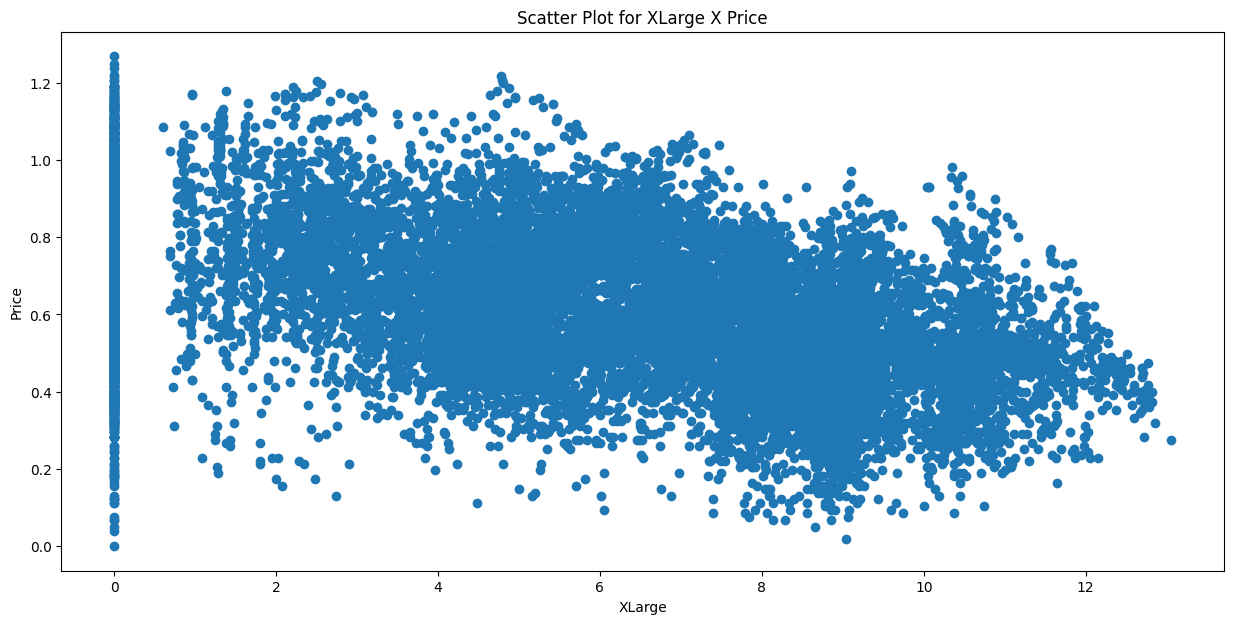

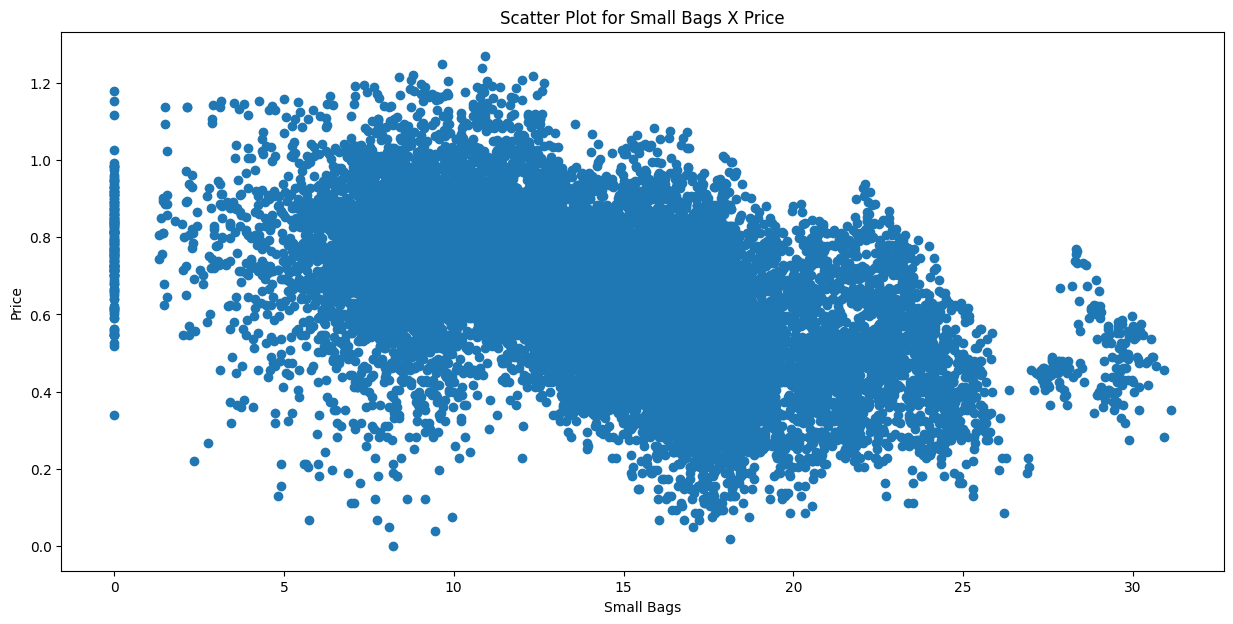

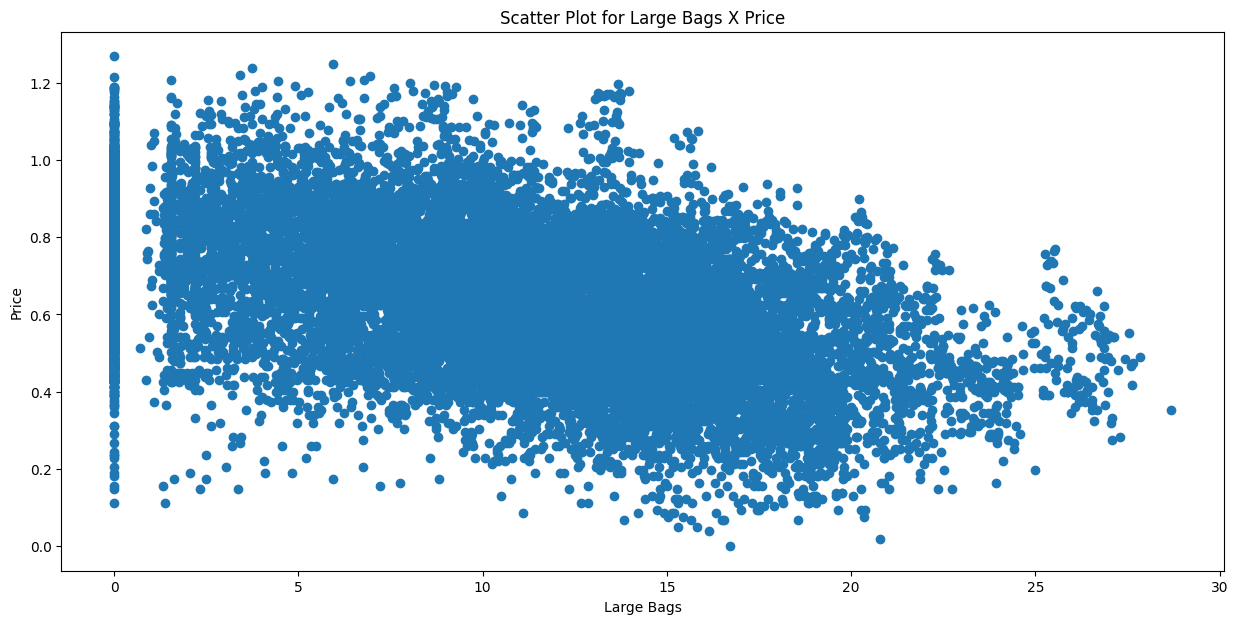

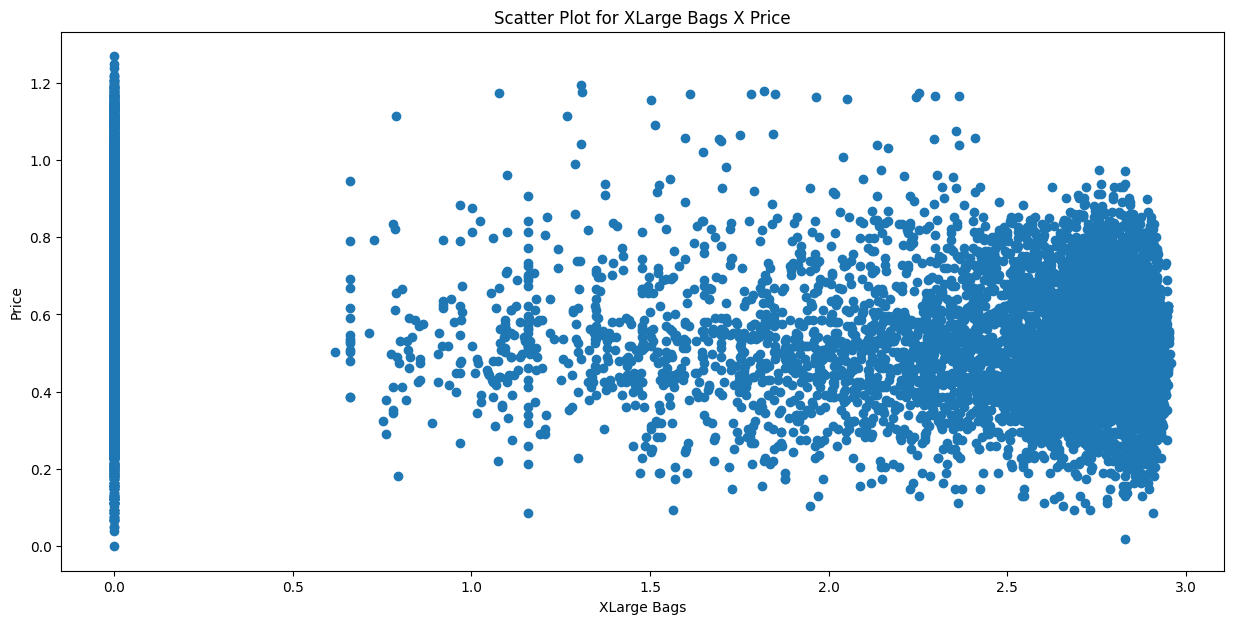

In [ ]:
for i in negative:
  plt.figure(figsize=(15, 7))
  plt.scatter(dataset[columns[i]], dataset['Average Price'])
  plt.xlabel(f'{columns[i]}')
  plt.ylabel('Price')
  plt.title(f'Scatter Plot for {columns[i]} X Price')
  plt.show()

**Inference from Scatter Plots**

1. The positively correlated attributes have a distribution around a line going upwards from left to right.
2. The negatively correlated attributes have a distribution around a line going downwards from left to right. Out of all the negatively correlated attributes 'XLarge Bags' shows the most deviation from the line.

### **Training without feature selection**

**Train Test Split**



*   X -> All Independent features
*   y -> Dependent feature, Price



In [ ]:
X = dataset.drop(columns = ['Average Price'])
y = dataset['Average Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Linear Regression**

Fitting the model with all the features.

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**R^2 score**

Calculating the R^2 score for the model before filtering out the features.

In [ ]:
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 score before feature selection: ", round(r2 * 100, 2), "%")

R^2 score before feature selection:  37.84 %


### **Stats Model Summary**

In [ ]:
for column in columns:
  X = sm.add_constant(dataset[column])
  y = dataset['Average Price']
  model = sm.OLS(y, X).fit()
  print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          Average Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                       nan
Date:                Fri, 15 Mar 2024   Prob (F-statistic):                nan
Time:                        10:06:29   Log-Likelihood:                 4344.3
No. Observations:               18249   AIC:                            -8687.
Df Residuals:                   18248   BIC:                            -8679.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.944e-37   6.52e-40    451.503      0.0

### **Training with feature selection**

**Feature Selection**



1.   Calculating means for negative and positive correlations.
2.   Selecting columns to drop based on the mean values. (Dropping columns if they have negative correlation and is greater than negative mean and vice versa for positively correlated features.)




In [ ]:
columns_to_drop = ['Average Price']

negative_total = float(0.0)
positive_total = float(0.0)
neg_count = 0
pos_count = 0

for i in correlation_scores:
  if i < 0.0:
    negative_total = negative_total + i
    neg_count += 1
  else:
    positive_total = positive_total + i
    pos_count += 1

for i in range(0, len(correlation_scores)):
  if correlation_scores[i] < 0.0:
    if correlation_scores[i] >= (negative_total/neg_count):
      columns_to_drop.append(columns[i])
  else:
    if correlation_scores[i] <= (positive_total/pos_count):
      columns_to_drop.append(columns[i])

print("Columns that are to be dropped: ", columns_to_drop)

Columns that are to be dropped:  ['Average Price', 'Date', 'Large', 'XLarge Bags', 'Year']


**NOTE:** The column 'Average Price' is dropped because it is a dependent attribute.

**Train Test Split with selected features.**

In [ ]:
X = dataset.drop(columns = columns_to_drop)
y = dataset['Average Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Linear Regression**

Fitting the regression model with updated feature set.

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

**R^2 score**

Calculating Performance score using R^2 score.

In [ ]:
y_pred = regressor.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R^2 score after feature selection: ", round(r2 * 100, 2), "%")

R^2 score after feature selection:  43.38 %


### **Inference**

1. The score increases after doing feature selection.